# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`.**



In [61]:
import pandas as pd
import seaborn

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [62]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [64]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [65]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [66]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [67]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [68]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [69]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [70]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [71]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [72]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [73]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [74]:
data.duplicated().sum()

54

In [75]:
data = data.drop_duplicates()

**Задание 15. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [76]:
data['education'] = data['education'].str.lower()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [77]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [78]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [79]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [80]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [81]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

## Исследуйте данные и ответьте на вопросы

**Задание 19. Есть ли зависимость между количеством детей и возвратом кредита в срок?**

Обсудим эволюцию в решении задачи, по мере работы над заданием. Сгруппируем значения по столбцу 'debt'

In [82]:
count_children = data.groupby('children')['debt'].count()
print(count_children)



children
0    14107
1     4809
2     2052
3      330
4       41
5        9
Name: debt, dtype: int64


сгруппируем таблицу, отображающую взаимосвязь между количеством детей в семье и количеству неотданных кредитов

In [83]:
sum_children = data.groupby('children')['debt'].sum()
display(sum_children)

children
0    1063
1     444
2     194
3      27
4       4
5       0
Name: debt, dtype: int64

рассчитаем результат, отражающий процент кредитов, относительно суммы выданных кредитов итого

In [84]:
result = (sum_children/count_children) * 100
display(result)

children
0    7.535266
1    9.232689
2    9.454191
3    8.181818
4    9.756098
5    0.000000
Name: debt, dtype: float64

Решим задачу альтернативным способом

In [85]:
table_1 = pd.pivot_table(data, index = 'children', values = 'debt', aggfunc = 'count')
dept_by_purpose = table_1
table_1.style.highlight_max(color = 'yellow').highlight_min(color = 'lightblue')

,debt
children,
0,14107
1,4809
2,2052
3,330
4,41
5,9


In [86]:
table_2 = pd.pivot_table(data, index = 'children', values = 'debt', aggfunc = 'sum')
dept_by_purpose['non_returned_debt'] = table_2['debt']

In [87]:
dept_by_purpose['return_ratio'] = dept_by_purpose['non_returned_debt']/dept_by_purpose['debt']
display(dept_by_purpose)
table_1.style.highlight_max(color = 'yellow').highlight_min(color = 'lightblue')

,debt,non_returned_debt,return_ratio
children,,,
0,14107,1063,0.075353
1,4809,444,0.092327
2,2052,194,0.094542
3,330,27,0.081818
4,41,4,0.097561
5,9,0,0.000000


,debt,non_returned_debt,return_ratio
children,,,
0,14107,1063,0.075353
1,4809,444,0.092327
2,2052,194,0.094542
3,330,27,0.081818
4,41,4,0.097561
5,9,0,0.000000


In [88]:
table_1 = pd.pivot_table(data, index = 'children', values = 'debt', aggfunc = ['count', 'sum', 'mean'] )
table_1.columns = ['всего кредитов', 'всего долгов', '% задолженности']
table_1.style.highlight_max(color = 'yellow').highlight_min(color = 'lightblue')

,всего кредитов,всего долгов,% задолженности
children,,,
0,14107,1063,0.075353
1,4809,444,0.092327
2,2052,194,0.094542
3,330,27,0.081818
4,41,4,0.097561
5,9,0,0.000000


Решим задачу альтернативным способом, с использованием функции pivot_table библиотеки Pandas

In [89]:
pd.pivot_table(data, index= 'children', values = 'debt')


,debt
children,
0,0.075353
1,0.092327
2,0.094542
3,0.081818
4,0.097561
5,0.000000


**Вывод: 
Высказаться однозначно о том, что увеличенние количества детей в семье приводит к ухудшению платежеспособности нельзя, т к разница между просрочками в семьях с детьми и без детей минимальна. 
Высокая доля просрочек в семьях с 4 детьми. 
Низкая доля просрочек в семьях, где нет детей. 
По семьях с 5 детьми однозначно высказаться, на основании данных из датасета не представляется возможным, т к собранной информации явно недосточно для однозначного вывода.**

**Задание 20. Есть ли зависимость между семейным положением и возвратом кредита в срок?**

Семейного положения касаются два столбца: непосредственно family_status и его цифровое выражение family_status_id. 
Выделим их в отдельный датафрейм и удалим в нем дубликаты.

In [90]:
family_dict = data[['family_status_id','family_status']]
family_dict = family_dict.drop_duplicates().reset_index(drop=True)
print(family_dict) 

   family_status_id          family_status
0                 0        женат / замужем
1                 1       гражданский брак
2                 2         вдовец / вдова
3                 3              в разводе
4                 4  Не женат / не замужем


сосчитаем в исходном датафрейме количество кредитов для каждого семейного статуса

In [91]:
family_statuses = data['family_status_id'].value_counts()

print(family_statuses)

0    12266
1     4146
4     2796
3     1189
2      951
Name: family_status_id, dtype: int64


исследуем взаимосвязь между семейным статусом и невозвратным долгом

In [92]:
grouped_by_family = data.groupby('family_status_id')['debt'].mean().reset_index()

grouped_by_family = grouped_by_family['debt']*100

print(grouped_by_family)

0    7.557476
1    9.286059
2    6.624606
3    7.064760
4    9.763948
Name: debt, dtype: float64


#соберем новую таблицу с общим количеством кредитов каждого семейного статуса и должников, после чего подсчитаем долю должников в каждом статусе

In [93]:
family_status = ['женат / замужем', 'гражданский брак', 'вдовец / вдова', 'в разводе', 'Не женат / не замужем']
family_and_debt = pd.DataFrame({'family_status' : family_status, 'family_status_id': family_statuses,
                   'debt': grouped_by_family})
family_and_debt['debt_percentage'] = (grouped_by_family / family_statuses) * 100

print(family_and_debt)

           family_status  family_status_id      debt  debt_percentage
0        женат / замужем             12266  7.557476         0.061613
1       гражданский брак              4146  9.286059         0.223976
2         вдовец / вдова               951  6.624606         0.696594
3              в разводе              1189  7.064760         0.594177
4  Не женат / не замужем              2796  9.763948         0.349211


In [103]:
table_1 = pd.pivot_table(data, index = 'family_status', values = 'debt', aggfunc = ['count', 'sum', 'mean'] )
table_1.columns = ['всего кредитов', 'всего долгов', '% задолженности']
table_1['% задолженности'] = table_1['% задолженности'].apply('{:.2%}'.format)
display(table_1.sort_values('% задолженности', ascending = False))
table_1.style.highlight_max(color = 'yellow').highlight_min(color = 'lightblue')

,всего кредитов,всего долгов,% задолженности
family_status,,,
Не женат / не замужем,2796,273,9.76%
гражданский брак,4146,385,9.29%
женат / замужем,12266,927,7.56%
в разводе,1189,84,7.06%
вдовец / вдова,951,63,6.62%


,всего кредитов,всего долгов,% задолженности
family_status,,,
Не женат / не замужем,2796,273,9.76%
в разводе,1189,84,7.06%
вдовец / вдова,951,63,6.62%
гражданский брак,4146,385,9.29%
женат / замужем,12266,927,7.56%


Решим задачу альтернативным способом, с использованием функции pivot_table библиотеки Pandas

In [95]:
pd.pivot_table(data, index= 'family_status', values = 'debt')


,debt
family_status,
Не женат / не замужем,0.097639
в разводе,0.070648
вдовец / вдова,0.066246
гражданский брак,0.092861
женат / замужем,0.075575


**Вывод: 1) наименьший риск невозврата в категории "вдовец / вдова" 2) наибольший риск невозврата у людей в категориях: "не женат / не замужем", "гражданский брак". В целом, в категории женатых/замужних, в отличие от категории неженатых/незамужних, разница в невозврате долга составляет: 7.5 % vs 9.7%, т е практически на 22%. Даннкую зависимости имеет смысл использовать при построении скоринговой модели оценки платежеспособности заемщика.**

**Задание 21. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?**

In [96]:
total_income_debt = data[['total_income','debt']]
# Ваш код будет здесь. Вы можете создавать новые ячейки.

In [97]:

total_income_debt = total_income_debt.loc[total_income_debt ['debt'] == 1]
total_income_debt['debt_income'] = total_income_debt['total_income'].apply(categorize_income)
total_income_debt[['debt_income', 'debt']].groupby('debt_income').sum().sort_values('debt_income', ascending = True)







,debt
debt_income,
A,2
B,354
C,1353
D,21
E,2


Решим задачу альтернативным способом, с использованием функции pivot_table библиотеки Pandas

In [98]:
pd.pivot_table(data, index='total_income_category', values = 'debt')

,debt
total_income_category,
A,0.080000
B,0.070602
C,0.084891
D,0.060172
E,0.090909


Используя данные, полученные при делении клиентов на категории (Задание 16), в результате исследования, мы получили информацию о том, что больше всего должников в категории Е, с уровенем дохода 0 - 30 000.

In [106]:
table_1 = pd.pivot_table(data, index = 'total_income_category', values = 'debt', aggfunc = ['count', 'sum', 'mean'] )
table_1.columns = ['число заемщиков', 'число должников', '% задолженности']
table_1['% задолженности'] =  table_1['% задолженности'].apply('{:.2%}'.format)
table_1.style.highlight_max(color = 'yellow').highlight_min(color = 'lightblue')

,число заемщиков,число должников,% задолженности
total_income_category,,,
A,25,2,8.00%
B,5014,354,7.06%
C,15938,1353,8.49%
D,349,21,6.02%
E,22,2,9.09%


**Вывод: В результате исследования данных, мы приходим к выводу, что чем больше уровень дохода, тем меньшее количество задолженностей по кредитам. Для более детального исследования, требуется углубленная категоризация интересующей группы**

<AxesSubplot:xlabel='число заемщиков', ylabel='доля невозврата'>

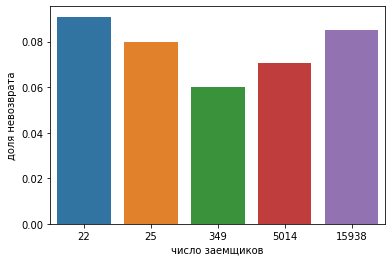

In [100]:
seaborn.barplot(x = table_1['число заемщиков'], y = table_1['доля невозврата'])

**Задание 22. Как разные цели кредита влияют на его возврат в срок?**

используя аналогию с предыдущими задачами, решим данную задачу по обсужденной выше схеме

In [101]:
debtors_purpose = data[['purpose_category', 'purpose', 'debt']]
debtors_purpose_grouped = debtors_purpose.groupby('purpose_category').count()
debtors_purpose_grouped['number'] = debtors_purpose.loc[debtors_purpose['debt'] == 1].groupby('purpose_category').sum()
debtors_purpose_grouped['mean, %'] = (debtors_purpose_grouped['number'] / debtors_purpose_grouped['debt']) * 100
debtors_purpose_grouped[['mean, %']].sort_values('mean, %', ascending=False)

,"mean, %"
purpose_category,
операции с автомобилем,9.343611
получение образования,9.250439
проведение свадьбы,7.874355
операции с недвижимостью,7.253115


Решим задачу альтернативным способом, с использованием функции pivot_table библиотеки Pandas

In [102]:
pd.pivot_table(data, index='purpose_category', values='debt')

,debt
purpose_category,
операции с автомобилем,0.093436
операции с недвижимостью,0.072531
получение образования,0.092504
проведение свадьбы,0.078744


**Вывод: автокредитование и получение образования чаще всего приводят к проблеме невыплаты долга**

**Задание 23. Приведите возможные причины появления пропусков в исходных данных.**

*Ответ: к возможным причинам относятся: человеческий фактор, нежелание раскрывать свои доходы, технические неисправности*

**Задание 24. Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.**

**Ответ: Медиана - это репрезентативное значение показателя, позволяющее не искажать результаты исследования, на фоне потери части данных. В данном случае ее совершенно логично использовать, т к данные категоризированы и каждой категории соответствует своя медиана.**

## Общий вывод.

Портрет заёмщика-должника это: Многодетные, состоящие в гражданском браке люди, берущие займ на операции с автомобилем или получение образования.
Портрет заёмщика с наименьшей долговой нагрузкой это: бездетные состоящие в официальном браке, вдовы либо вдовцы берущие займ на недвижимость.
